## Mini Project III

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
#Read files:
twm_accounts = pd.read_csv("twm_accounts.csv", delimiter=';')
twm_checking_acct = pd.read_csv("twm_checking_acct.csv", delimiter=';')
twm_checking_tran = pd.read_csv("twm_checking_tran.csv", delimiter=';')
twm_credit_acct = pd.read_csv("twm_credit_acct.csv", delimiter=';')
twm_credit_tran = pd.read_csv("twm_credit_tran.csv", delimiter=';')
twm_customer = pd.read_csv("twm_customer.csv", delimiter=';')
twm_savings_acct = pd.read_csv("twm_savings_acct.csv", delimiter=';')
twm_savings_tran = pd.read_csv("twm_savings_tran.csv", delimiter=';')
twm_transactions = pd.read_csv("twm_transactions.csv", delimiter=';')

# Demographics

In [3]:
demographics = twm_customer.drop(['name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name' , 'postal_code', 'city_name'], axis = 1)
demographics

cust_id  income  age  years_with_bank  nbr_children gender  \
0    1362691   26150   46                5             1     M    
1    1362487    6605   71                1             0     M    
2    1363160   18548   38                8             0     F    
3    1362752   47668   54                3             0     F    
4    1362548   44554   59                9             2     F    
..       ...     ...  ...              ...           ...    ...   
742  1363324   14795   36                6             1     F    
743  1362895   26387   56                6             1     M    
744  1362569   61300   50                0             2     M    
745  1363364   15100   37                7             0     F    
746  1363303   17875   18                3             0     F    

     marital_status state_code  
0                 2       NV    
1                 2       CA    
2                 1       CA    
3                 1       CA    
4                 4       NY    
..              ...        ...  
742               4       CA    
743               2       NY    
744               2       NM    
745               2       AL    
746               1       CA    

[747 rows x 8 columns]

# Transactions

In [4]:
#dropping columns
twm_accounts = twm_accounts[['cust_id', 'acct_nbr', 'acct_type', 'account_active', 'ending_balance']]

In [5]:
twm_accounts.head()

cust_id          acct_nbr acct_type account_active  ending_balance
0  1362806          13628063      SV               Y           284.58
1  1362709  4561143213627090      CC               Y           496.15
2  1362836  4561143213628360      CC               Y          1000.00
3  1363311          13633112      CK               Y           968.46
4  1363361  4561143213633610      CC               Y           462.28

In [6]:
twm_accounts.acct_type.value_counts()

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64

In [7]:
#dropping columns
twm_transactions = twm_transactions[['acct_nbr', 'tran_id', 'tran_amt']]

In [8]:
#merging twm_accounts and twm_transactions
trans = pd.merge(twm_accounts, twm_transactions, on="acct_nbr")

In [9]:
trans.groupby(['cust_id', 'acct_nbr']).apply(lambda df: df.loc[df.cust_id.idxmax()])

cust_id          acct_nbr acct_type account_active  \
cust_id acct_nbr                                                               
1362480 13624802          1362480          13624802      CK               Y    
        13624803          1362480          13624803      SV               Y    
        4561143213624800  1362480  4561143213624800      CC               N    
1362484 13624842          1362484          13624842      CK               Y    
        13624843          1362484          13624843      SV               Y    
...                           ...               ...       ...            ...   
1363492 4561143213634920  1363492  4561143213634920      CC               Y    
1363493 13634932          1363493          13634932      CK               Y    
        13634933          1363493          13634933      SV               N    
1363495 13634952          1363495          13634952      CK               Y    
        13634953          1363495          13634953      SV               Y    

                          ending_balance  tran_id  tran_amt  
cust_id acct_nbr                                             
1362480 13624802                   86.86       62    -50.64  
        13624803                 1187.97        6    398.14  
        4561143213624800           20.00       32   2529.29  
1362484 13624842                   95.32       25      0.00  
        13624843                 2122.17       11      0.81  
...                                  ...      ...       ...  
1363492 4561143213634920         6869.00        3  -1301.88  
1363493 13634932                 2053.90       17      0.00  
        13634933                  553.61        2    -91.05  
1363495 13634952                  178.50       89      0.00  
        13634953                 2783.16       20      3.61  

[1397 rows x 7 columns]

In [10]:
#trans.sort_values(by = 'account_active')

In [11]:
#checking # of transactions per each cust_id
trans.cust_id.value_counts()

1363236    263
1363002    254
1362978    251
1362839    243
1362525    236
          ... 
1363091     12
1362734     11
1363096      5
1363351      4
1363146      1
Name: cust_id, Length: 664, dtype: int64

In [12]:
#creating dataframe based on # of transactions
df = trans.cust_id.value_counts().to_frame().reset_index()
df.columns = ['cust_id', 'trans_count']

In [13]:
#creating dataframe based on sum of net transaction amount
transactions = trans.groupby(['cust_id'], as_index=False)['tran_amt'].sum()
transactions.columns = ['cust_id', 'net_trans']

In [14]:
transactions

cust_id  net_trans
0    1362480    2185.99
1    1362484     335.39
2    1362485    -925.52
3    1362486   -1108.36
4    1362487   -3553.12
..       ...        ...
659  1363490      34.24
660  1363491    -187.63
661  1363492   -2857.53
662  1363493   -3847.51
663  1363495   -1965.01

[664 rows x 2 columns]

In [15]:
transactions.net_trans.describe()

count      664.000000
mean      -918.540949
std       2707.684972
min     -13384.540000
25%      -2474.237500
50%       -284.460000
75%        466.605000
max       9804.750000
Name: net_trans, dtype: float64

In [16]:
trans[['acct_nbr', 'ending_balance', 'tran_amt']].corr()

acct_nbr  ending_balance  tran_amt
acct_nbr        1.000000        0.172803  0.016400
ending_balance  0.172803        1.000000 -0.002167
tran_amt        0.016400       -0.002167  1.000000

In [17]:
#merging dataframes
df = pd.merge(df, transactions, on="cust_id")

In [18]:
df

cust_id  trans_count  net_trans
0    1363236          263    2339.30
1    1363002          254     152.25
2    1362978          251   -6202.15
3    1362839          243   -9752.74
4    1362525          236    1821.32
..       ...          ...        ...
659  1363091           12      34.80
660  1362734           11     -15.37
661  1363096            5     395.47
662  1363351            4       1.08
663  1363146            1    2814.61

[664 rows x 3 columns]

# Savings

In [19]:
#creating dataframe based on savings account
savings = twm_savings_acct[['cust_id', 'acct_nbr', 'ending_balance']]
savings.columns = ['cust_id', 'savings_acct', 'savings_bal']

In [20]:
savings

cust_id  savings_acct  savings_bal
0    1363160      13631603       122.54
1    1362487      13624873        12.89
2    1362548      13625483       254.02
3    1362752      13627523       609.33
4    1363017      13630173      2901.35
..       ...           ...          ...
416  1363141      13631413       528.57
417  1363038      13630383       508.26
418  1362529      13625293       873.14
419  1362895      13628953        96.25
420  1362855      13628553       161.04

[421 rows x 3 columns]

In [21]:
#savings.sort_values(by = 'savings_bal', ascending=False)

In [22]:
#Sum of transactions to Savings Accounts
twm_savings_tran.groupby(['cust_id']).tran_amt.agg([sum]).sort_values(by = 'sum', ascending=False)

sum
cust_id          
1362766  11079.94
1363337   7234.57
1363366   7006.52
1362969   4729.25
1362594   4635.47
...           ...
1362725  -1207.92
1362894  -1652.98
1363264  -1725.93
1363182  -2382.26
1363018  -2405.19

[420 rows x 1 columns]

In [23]:
twm_savings_tran.groupby(['cust_id', 'tran_id']).apply(lambda df: df.loc[df.tran_id.idxmax()])

cust_id  tran_id  tran_amt  principal_amt  interest_amt  \
cust_id tran_id                                                            
1362480 1        1362480        1      0.00           0.00          0.00   
        2        1362480        2    269.23         269.23          0.00   
        3        1362480        3      1.22           0.00          1.22   
        4        1362480        4      1.22           0.00          1.22   
        5        1362480        5      1.22           0.00          1.22   
...                  ...      ...       ...            ...           ...   
1363495 32       1363495       32     79.95          79.95          0.00   
        33       1363495       33    -80.00         -80.00          0.00   
        34       1363495       34     66.12          66.12          0.00   
        35       1363495       35    -60.00         -60.00          0.00   
        36       1363495       36      3.47           0.00          3.47   

                 new_balance   tran_date tran_time channel tran_code  
cust_id tran_id                                                       
1362480 1             707.09    3.1.1995    170151      C       IQ    
        2             976.32    4.1.1995     15501      A       DP    
        3             977.54   31.1.1995    235959              IN    
        4             978.76   28.2.1995    235959              IN    
        5             979.98   31.3.1995    235959              IN    
...                      ...         ...       ...     ...       ...  
1363495 32           2853.57  20.12.1995    163500      A       DP    
        33           2773.57  20.12.1995    163617      A       WD    
        34           2839.69  21.12.1995    154335      A       DP    
        35           2779.69  22.12.1995    170340      A       WD    
        36           2783.16  31.12.1995    235959              IN    

[11189 rows x 10 columns]

In [24]:
twm_accounts.groupby(['cust_id', 'acct_nbr']).apply(lambda df: df.loc[df.cust_id.idxmax()])

cust_id          acct_nbr acct_type account_active  \
cust_id acct_nbr                                                               
1362480 13624802          1362480          13624802      CK               Y    
        13624803          1362480          13624803      SV               Y    
        4561143213624800  1362480  4561143213624800      CC               N    
1362484 13624842          1362484          13624842      CK               Y    
        13624843          1362484          13624843      SV               Y    
...                           ...               ...       ...            ...   
1363493 13634932          1363493          13634932      CK               Y    
        13634933          1363493          13634933      SV               N    
        4561143213634930  1363493  4561143213634930      CC               Y    
1363495 13634952          1363495          13634952      CK               Y    
        13634953          1363495          13634953      SV               Y    

                          ending_balance  
cust_id acct_nbr                          
1362480 13624802                   86.86  
        13624803                 1187.97  
        4561143213624800           20.00  
1362484 13624842                   95.32  
        13624843                 2122.17  
...                                  ...  
1363493 13634932                 2053.90  
        13634933                  553.61  
        4561143213634930            0.00  
1363495 13634952                  178.50  
        13634953                 2783.16  

[1409 rows x 5 columns]

# Checking

In [25]:
checking = twm_checking_acct[['cust_id', 'acct_nbr', 'ending_balance']]
checking.columns = ['cust_id', 'checking_acct', 'checking_bal']

In [26]:
checking

cust_id  checking_acct  checking_bal
0    1362548       13625482        569.65
1    1362487       13624872       1401.21
2    1363017       13630172        147.15
3    1362752       13627522          3.76
4    1363282       13632822         84.18
..       ...            ...           ...
515  1363467       13634672         58.47
516  1362855       13628552       1070.87
517  1363324       13633242       2325.37
518  1362569       13625692         46.48
519  1363303       13633032         39.22

[520 rows x 3 columns]

# Credit Accounts

In [27]:
credit = twm_credit_acct[['cust_id', 'acct_nbr', 'ending_balance']]
credit.columns = ['cust_id', 'credit_acct', 'debt']

In [28]:
df

cust_id  trans_count  net_trans
0    1363236          263    2339.30
1    1363002          254     152.25
2    1362978          251   -6202.15
3    1362839          243   -9752.74
4    1362525          236    1821.32
..       ...          ...        ...
659  1363091           12      34.80
660  1362734           11     -15.37
661  1363096            5     395.47
662  1363351            4       1.08
663  1363146            1    2814.61

[664 rows x 3 columns]

In [29]:
#Merging dataframes

In [30]:
deposit_accounts = pd.merge(checking, savings, on="cust_id", how = 'outer')

In [31]:
deposit_accounts['total_bal'] = deposit_accounts.checking_bal.fillna(0) + deposit_accounts.savings_bal.fillna(0)

In [32]:
df = pd.merge(df, deposit_accounts, on="cust_id")

In [33]:
df = pd.merge(df, credit, on="cust_id")

In [34]:
df['net_worth'] = df.total_bal - df.debt

In [36]:
#Dropping account numbers
df= df.drop(['checking_acct', 'savings_acct', 'credit_acct'], axis = 1)

In [37]:
df['has_checking'] =  df.checking_bal.notnull()

In [38]:
df['has_savings'] =  df.savings_bal.notnull()

In [44]:
df.describe()

trans_count     net_trans  checking_bal   savings_bal     total_bal  \
count   429.000000    429.000000    384.000000    297.000000    429.000000   
mean    140.806527  -1021.979837    709.068438   1272.417744   1515.595221   
std      49.083491   2946.526838   1182.709021   2199.923857   2360.335207   
min      24.000000 -13384.540000      0.000000      2.740000      0.000000   
25%     112.000000  -2684.290000     49.035000    245.660000    278.980000   
50%     148.000000   -662.090000    273.880000    680.940000    867.840000   
75%     176.000000    725.890000    899.022500   1497.850000   1816.570000   
max     263.000000   9804.750000  13185.470000  22432.780000  26792.610000   

              debt     net_worth  has_checking  has_savings  
count   429.000000    429.000000    429.000000   429.000000  
mean   1186.411585    329.183636      0.895105     0.692308  
std    1358.801055   2612.711528      0.306776     0.462077  
min       0.000000  -9153.520000      0.000000     0.000000  
25%     357.000000   -741.300000      1.000000     0.000000  
50%    1000.000000    -25.600000      1.000000     1.000000  
75%    1400.000000   1066.050000      1.000000     1.000000  
max    9500.000000  26772.610000      1.000000     1.000000

In [41]:
df.has_savings.replace({
    True: 1,
    False: 0,
}, inplace=True)
df.has_checking.replace({
    True: 1,
    False: 0,
}, inplace=True)

In [40]:
df= df.drop(['checking_bal', 'savings_bal'], axis = 1)

In [41]:
twm_accounts

cust_id          acct_nbr acct_type account_active  ending_balance
0     1362806          13628063      SV               Y           284.58
1     1362709  4561143213627090      CC               Y           496.15
2     1362836  4561143213628360      CC               Y          1000.00
3     1363311          13633112      CK               Y           968.46
4     1363361  4561143213633610      CC               Y           462.28
...       ...               ...       ...            ...             ...
1404  1362556  4561143213625560      CC               N            20.00
1405  1362624  4561143213626240      CC               Y          1400.00
1406  1362875  4561143213628750      CC               Y          3000.00
1407  1362654          13626543      SV               Y           622.46
1408  1362703          13627032      CK               Y           107.33

[1409 rows x 5 columns]

In [42]:
twm_accounts.groupby(['cust_id']).ending_balance.agg([len, min, max, sum]).len.value_counts()

3.0    252
2.0    240
1.0    173
Name: len, dtype: int64

# Clustering

In [43]:
df

cust_id  trans_count  net_trans  total_bal     debt  net_worth  \
0    1363236          263    2339.30    1120.50  1555.34    -434.84   
1    1363002          254     152.25    1137.89  2684.46   -1546.57   
2    1362978          251   -6202.15     307.77  2103.69   -1795.92   
3    1362839          243   -9752.74    3452.83  3783.62    -330.79   
4    1362525          236    1821.32     408.99  1051.01    -642.02   
..       ...          ...        ...        ...      ...        ...   
424  1363194           30    3324.54     455.67    82.15     373.52   
425  1363113           29    -618.70    1241.78   660.40     581.38   
426  1363127           26     533.32     124.01   305.79    -181.78   
427  1362930           25    1625.55     800.42     0.00     800.42   
428  1362909           24    4169.03    1149.38    54.09    1095.29   

     has_checking  has_savings  
0               1            1  
1               1            0  
2               1            1  
3               1            1  
4               1            1  
..            ...          ...  
424             0            1  
425             0            1  
426             0            1  
427             0            1  
428             0            1  

[429 rows x 8 columns]

In [44]:
df.iloc[:,1:]

trans_count  net_trans  total_bal     debt  net_worth  has_checking  \
0            263    2339.30    1120.50  1555.34    -434.84             1   
1            254     152.25    1137.89  2684.46   -1546.57             1   
2            251   -6202.15     307.77  2103.69   -1795.92             1   
3            243   -9752.74    3452.83  3783.62    -330.79             1   
4            236    1821.32     408.99  1051.01    -642.02             1   
..           ...        ...        ...      ...        ...           ...   
424           30    3324.54     455.67    82.15     373.52             0   
425           29    -618.70    1241.78   660.40     581.38             0   
426           26     533.32     124.01   305.79    -181.78             0   
427           25    1625.55     800.42     0.00     800.42             0   
428           24    4169.03    1149.38    54.09    1095.29             0   

     has_savings  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
424            1  
425            1  
426            1  
427            1  
428            1  

[429 rows x 7 columns]

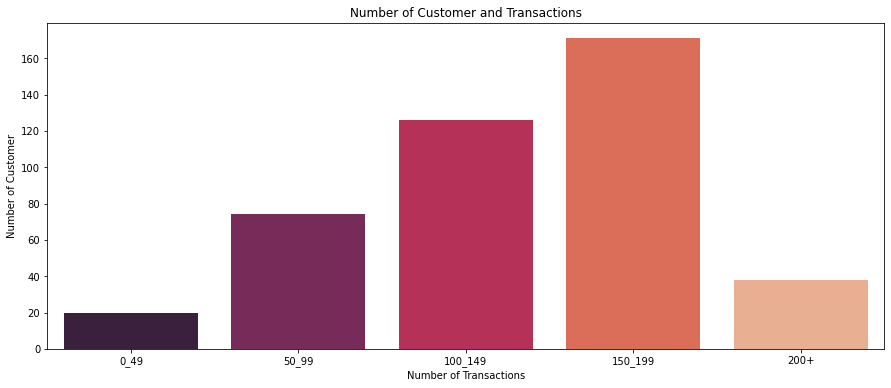

In [45]:
trans0_49 = df.trans_count[(df.trans_count<= 49) & (df.trans_count >= 0)]
trans50_99 = df.trans_count[(df.trans_count <= 99) & (df.trans_count >= 50)]
trans100_149 = df.trans_count[(df.trans_count <= 149) & (df.trans_count>= 100)]
trans150_199 = df.trans_count[(df.trans_count <= 199) & (df.trans_count >= 150)]
above200 = df.trans_count[df.trans_count >= 200]

x = ["0_49","50_99","100_149","150_199","200+"]
y = [len(trans0_49.values),len(trans50_99.values),len(trans100_149.values),len(trans150_199.values),len(above200.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customer")
plt.show()

In [46]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.figure(figsize=(12,6))  
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.grid()
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1,11,1))
    plt.ylabel('Distortion')
    plt.show() 

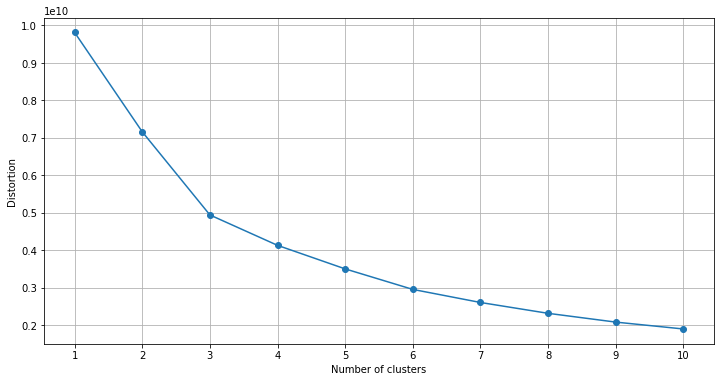

In [47]:
plot_distortion(df.iloc[:,1:],max_clusters=10)

In [48]:
df

cust_id  trans_count  net_trans  total_bal     debt  net_worth  \
0    1363236          263    2339.30    1120.50  1555.34    -434.84   
1    1363002          254     152.25    1137.89  2684.46   -1546.57   
2    1362978          251   -6202.15     307.77  2103.69   -1795.92   
3    1362839          243   -9752.74    3452.83  3783.62    -330.79   
4    1362525          236    1821.32     408.99  1051.01    -642.02   
..       ...          ...        ...        ...      ...        ...   
424  1363194           30    3324.54     455.67    82.15     373.52   
425  1363113           29    -618.70    1241.78   660.40     581.38   
426  1363127           26     533.32     124.01   305.79    -181.78   
427  1362930           25    1625.55     800.42     0.00     800.42   
428  1362909           24    4169.03    1149.38    54.09    1095.29   

     has_checking  has_savings  
0               1            1  
1               1            0  
2               1            1  
3               1            1  
4               1            1  
..            ...          ...  
424             0            1  
425             0            1  
426             0            1  
427             0            1  
428             0            1  

[429 rows x 8 columns]

In [49]:
km = KMeans(n_clusters=3, n_init=10,random_state=0)
clusters = km.fit_predict(df.iloc[:,1:])
df["cluster"] = clusters

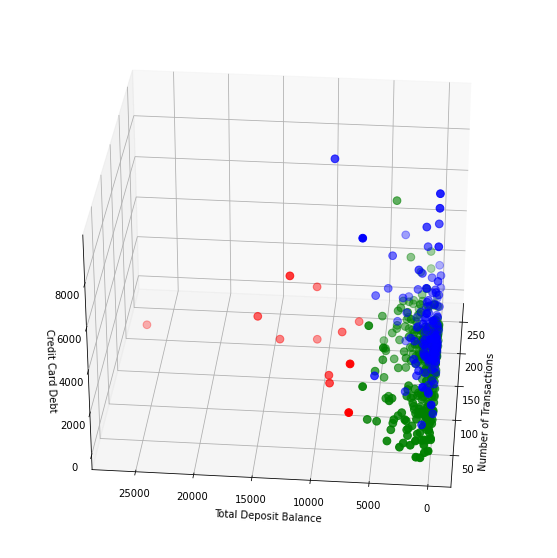

In [50]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.trans_count[df.cluster == 0], df.total_bal[df.cluster == 0], df.debt[df.cluster == 0], c='blue', s=60)
ax.scatter(df.trans_count[df.cluster == 1], df.total_bal[df.cluster == 1], df.debt[df.cluster == 1], c='red', s=60)
ax.scatter(df.trans_count[df.cluster == 2], df.total_bal[df.cluster == 2], df.debt[df.cluster == 2], c='green', s=60)
#ax.scatter(df.trans_count[df.cluster == 3], df.total_bal[df.cluster == 3], df.debt[df.cluster == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Number of Transactions")
plt.ylabel("Total Deposit Balance")
ax.set_zlabel('Credit Card Debt')
plt.show()

# Radar Chart

In [51]:
minmax = MinMaxScaler(feature_range=(0,3))
minmax_df = minmax.fit_transform(df)
new_demo = pd.DataFrame(minmax_df, columns=df.columns.to_list())

In [52]:
new_demo.cust_id = df.cust_id
new_demo.cluster = df.cluster
new_demo.has_checking = df.has_checking
new_demo.has_savings = df.has_savings

In [53]:
cluster_mean = new_demo.groupby('cluster').mean().reset_index()

In [54]:
new_demo

cust_id  trans_count  net_trans  total_bal      debt  net_worth  \
0    1363236     3.000000   2.034194   0.125464  0.491160   0.728051   
1    1363002     2.887029   1.751255   0.127411  0.847724   0.635216   
2    1362978     2.849372   0.929186   0.034461  0.664323   0.614394   
3    1362839     2.748954   0.469846   0.386617  1.194827   0.736739   
4    1362525     2.661088   1.967183   0.045795  0.331898   0.710750   
..       ...          ...        ...        ...       ...        ...   
424  1363194     0.075314   2.161655   0.051022  0.025942   0.795552   
425  1363113     0.062762   1.651518   0.139044  0.208547   0.812910   
426  1363127     0.025105   1.800554   0.013886  0.096565   0.749182   
427  1362930     0.012552   1.941856   0.089624  0.000000   0.831201   
428  1362909     0.000000   2.270907   0.128697  0.017081   0.855824   

     has_checking  has_savings  cluster  
0               1            1        2  
1               1            0        2  
2               1            1        0  
3               1            1        0  
4               1            1        2  
..            ...          ...      ...  
424             0            1        2  
425             0            1        2  
426             0            1        2  
427             0            1        2  
428             0            1        2  

[429 rows x 9 columns]

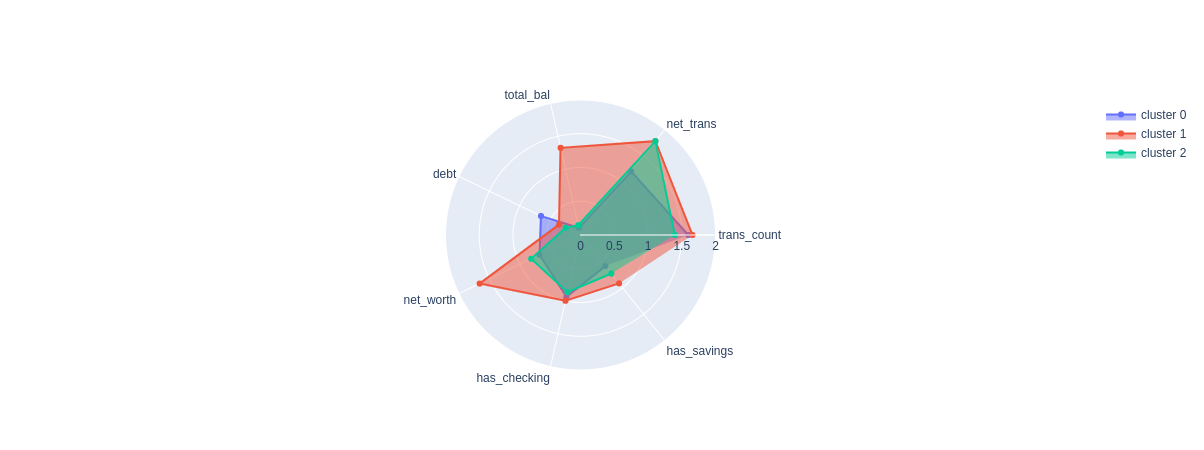

In [55]:
cluster_names = []
for i in range(len(cluster_mean)):
    cluster_names.append('cluster '+ str(i))

mean_list = []
for cluster in range(len(cluster_mean)):
    mean_list.append(cluster_mean.iloc[cluster, 2:].values.tolist())
col_names = cluster_mean.columns.values[2:].tolist()
col_names

import plotly.graph_objects as go

fig = go.Figure()

for means in range(len(mean_list)):
    fig.add_trace(go.Scatterpolar(
          r=mean_list[means],
          theta=col_names,
          fill='toself',
          name=cluster_names[means]
    ))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 2]
        )),
      showlegend=True
    )

fig.show()

# PCA

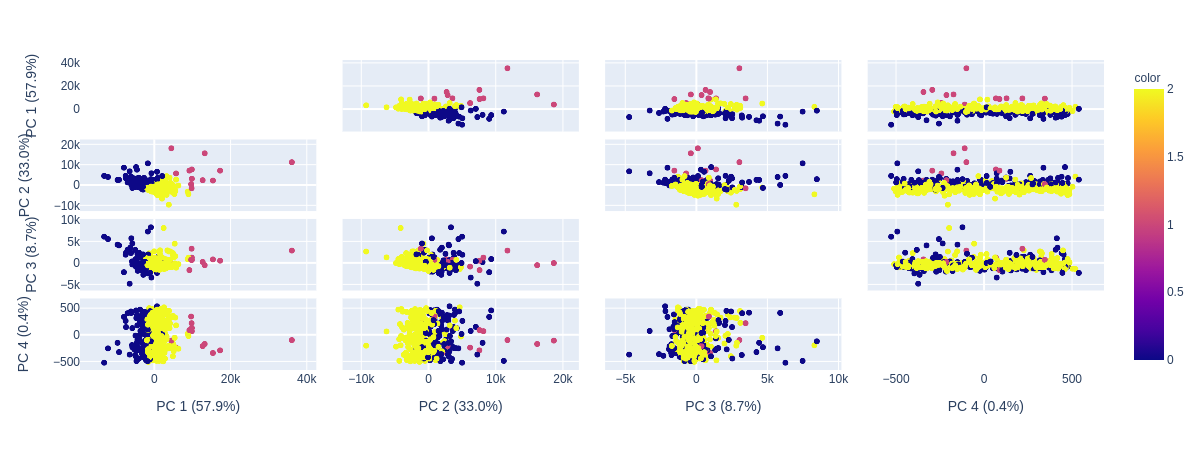

In [56]:
import plotly.express as px
from sklearn.decomposition import PCA

#df = px.data.iris()
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["cluster"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [57]:
df

cust_id  trans_count  net_trans  total_bal     debt  net_worth  \
0    1363236          263    2339.30    1120.50  1555.34    -434.84   
1    1363002          254     152.25    1137.89  2684.46   -1546.57   
2    1362978          251   -6202.15     307.77  2103.69   -1795.92   
3    1362839          243   -9752.74    3452.83  3783.62    -330.79   
4    1362525          236    1821.32     408.99  1051.01    -642.02   
..       ...          ...        ...        ...      ...        ...   
424  1363194           30    3324.54     455.67    82.15     373.52   
425  1363113           29    -618.70    1241.78   660.40     581.38   
426  1363127           26     533.32     124.01   305.79    -181.78   
427  1362930           25    1625.55     800.42     0.00     800.42   
428  1362909           24    4169.03    1149.38    54.09    1095.29   

     has_checking  has_savings  cluster  
0               1            1        2  
1               1            0        2  
2               1            1        0  
3               1            1        0  
4               1            1        2  
..            ...          ...      ...  
424             0            1        2  
425             0            1        2  
426             0            1        2  
427             0            1        2  
428             0            1        2  

[429 rows x 9 columns]

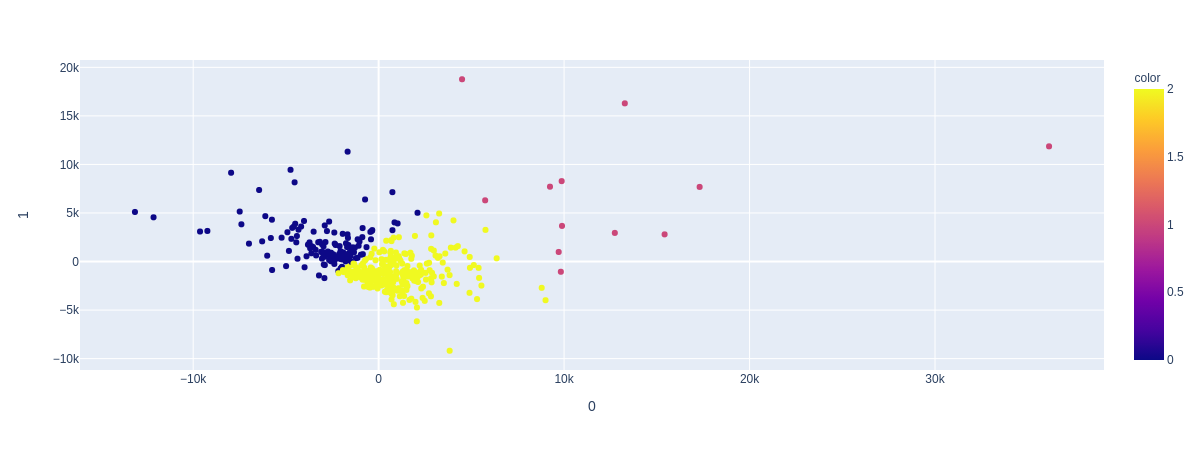

In [77]:
import plotly.express as px
from sklearn.decomposition import PCA

#df = px.data.iris()
#X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=5)
components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['cluster'])
fig.show()

In [59]:
df

cust_id  trans_count  net_trans  total_bal     debt  net_worth  \
0    1363236          263    2339.30    1120.50  1555.34    -434.84   
1    1363002          254     152.25    1137.89  2684.46   -1546.57   
2    1362978          251   -6202.15     307.77  2103.69   -1795.92   
3    1362839          243   -9752.74    3452.83  3783.62    -330.79   
4    1362525          236    1821.32     408.99  1051.01    -642.02   
..       ...          ...        ...        ...      ...        ...   
424  1363194           30    3324.54     455.67    82.15     373.52   
425  1363113           29    -618.70    1241.78   660.40     581.38   
426  1363127           26     533.32     124.01   305.79    -181.78   
427  1362930           25    1625.55     800.42     0.00     800.42   
428  1362909           24    4169.03    1149.38    54.09    1095.29   

     has_checking  has_savings  cluster  
0               1            1        2  
1               1            0        2  
2               1            1        0  
3               1            1        0  
4               1            1        2  
..            ...          ...      ...  
424             0            1        2  
425             0            1        2  
426             0            1        2  
427             0            1        2  
428             0            1        2  

[429 rows x 9 columns]

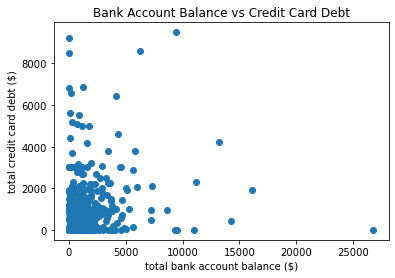

In [73]:
plt.scatter(df.total_bal,df.debt)
plt.title('Bank Account Balance vs Credit Card Debt')
plt.xlabel('total bank account balance ($)')
plt.ylabel('total credit card debt ($)')
plt.show()

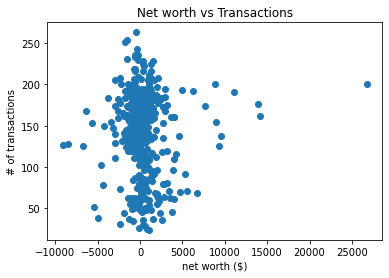

In [72]:
plt.scatter(df.net_worth,df.trans_count)
plt.title('Net worth vs Transactions')
plt.xlabel('net worth ($)')
plt.ylabel('# of transactions')
plt.show()

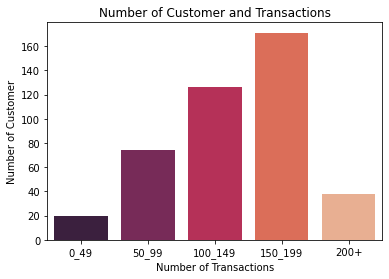

In [46]:
trans0_49 = df.trans_count[(df.trans_count<= 49) & (df.trans_count >= 0)]
trans50_99 = df.trans_count[(df.trans_count <= 99) & (df.trans_count >= 50)]
trans100_149 = df.trans_count[(df.trans_count <= 149) & (df.trans_count>= 100)]
trans150_199 = df.trans_count[(df.trans_count <= 199) & (df.trans_count >= 150)]
above200 = df.trans_count[df.trans_count >= 200]

x = ["0_49","50_99","100_149","150_199","200+"]
y = [len(trans0_49.values),len(trans50_99.values),len(trans100_149.values),len(trans150_199.values),len(above200.values)]

sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customer")
plt.show()

In [62]:
df[['trans_count', 'net_trans', 'total_bal', 'debt', 'net_worth', 'has_checking', 'has_savings', 'both']].describe()

trans_count     net_trans     total_bal         debt     net_worth  \
count   429.000000    429.000000    429.000000   429.000000    429.000000   
mean    140.806527  -1021.979837   1515.595221  1186.411585    329.183636   
std      49.083491   2946.526838   2360.335207  1358.801055   2612.711528   
min      24.000000 -13384.540000      0.000000     0.000000  -9153.520000   
25%     112.000000  -2684.290000    278.980000   357.000000   -741.300000   
50%     148.000000   -662.090000    867.840000  1000.000000    -25.600000   
75%     176.000000    725.890000   1816.570000  1400.000000   1066.050000   
max     263.000000   9804.750000  26792.610000  9500.000000  26772.610000   

       has_checking  has_savings        both  
count    429.000000   429.000000  429.000000  
mean       0.895105     0.692308    1.587413  
std        0.306776     0.462077    0.492875  
min        0.000000     0.000000    1.000000  
25%        1.000000     0.000000    1.000000  
50%        1.000000     1.000000    2.000000  
75%        1.000000     1.000000    2.000000  
max        1.000000     1.000000    2.000000

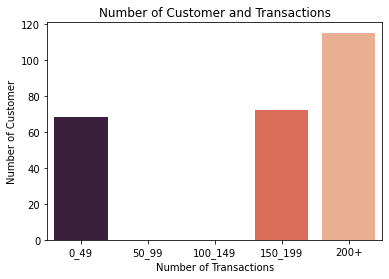

In [58]:
trans0_49 = df.net_worth[(df.net_worth<= -1000)]
trans50_99 = df.net_worth[(df.net_worth <= -999) & (df.net_worth >= 0)]
trans100_149 = df.net_worth[(df.net_worth <= 1) & (df.net_worth>= 1000)]
trans150_199 = df.net_worth[(df.net_worth <= 999) & (df.net_worth >= 150)]
above200 = df.net_worth[df.net_worth >= 1000]

x = ["0_49","50_99","100_149","150_199","200+"]
y = [len(trans0_49.values),len(trans50_99.values),len(trans100_149.values),len(trans150_199.values),len(above200.values)]

sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customer")
plt.show()

In [60]:
df['both'] = df.has_checking + df.has_savings

In [61]:
df

trans_count  net_trans  checking_bal  savings_bal  total_bal     debt  \
0            263    2339.30         52.80      1067.70    1120.50  1555.34   
1            254     152.25       1137.89          NaN    1137.89  2684.46   
2            251   -6202.15        278.86        28.91     307.77  2103.69   
3            243   -9752.74         32.80      3420.03    3452.83  3783.62   
4            236    1821.32         95.53       313.46     408.99  1051.01   
..           ...        ...           ...          ...        ...      ...   
424           30    3324.54           NaN       455.67     455.67    82.15   
425           29    -618.70           NaN      1241.78    1241.78   660.40   
426           26     533.32           NaN       124.01     124.01   305.79   
427           25    1625.55           NaN       800.42     800.42     0.00   
428           24    4169.03           NaN      1149.38    1149.38    54.09   

     net_worth  has_checking  has_savings  both  
0      -434.84             1            1     2  
1     -1546.57             1            0     1  
2     -1795.92             1            1     2  
3      -330.79             1            1     2  
4      -642.02             1            1     2  
..         ...           ...          ...   ...  
424     373.52             0            1     1  
425     581.38             0            1     1  
426    -181.78             0            1     1  
427     800.42             0            1     1  
428    1095.29             0            1     1  

[429 rows x 10 columns]